# Extract fragments with a given sequence from structures, and cluster based on eRMSD

In [1]:
from __future__ import absolute_import, division, print_function
import os
import glob
import numpy as np
import mdtraj as md
import barnaba as bb
from barnaba import definitions
import matplotlib as mpl
import matplotlib.pyplot as plt


# indir = "/mnt/c/Users/dista/OneDrive - University of Southampton/Reports-vivas-presentations/Papers/Paper_1-RNA_benchmark/with_revised_data/data/REST2_dynamics/UUCG/300K"
indir = "../../REST2_dynamics/UUCG/300K"
outdir = "../output/UUCG/300K/Gvec_clusters"

pdbdir = "%s/reference_structures/2KOC.pdb"%indir #directory of NMR models

os.system("mkdir %s" % outdir)
os.system("mkdir %s/snippets" %outdir)
os.system("mkdir %s/snippets_pdb" %outdir)

reference = "%s/reference_structures/UUCG-native.pdb"%indir  #usually is the native structure.
topol = "%s/reference_structures/UUCG-native.pdb"%indir  #doesn't have to be the same as reference.
traj = "%s/trajectories/traj_all_ffs-comb_ensembles.xtc"%indir  #needs to have the same number of atoms as the reference pdb.
sequence = "UUCG" #sequence of the hairpin loop (or the mobile part in general)

## Custom functions

In [2]:
#Function to create a custom cmap based on tab20 to be used throughout.
import matplotlib

def categorical_cmap(nc, nsc, cmap="tab10", continuous=False):
    if nc > plt.get_cmap(cmap).N:
        raise ValueError("Too many categories for colormap.")
    if continuous:
        ccolors = plt.get_cmap(cmap)(np.linspace(0,1,nc))
    else:
        ccolors = plt.get_cmap(cmap)(np.arange(nc, dtype=int))
    cols = np.zeros((nc*nsc, 3))
    for i, c in enumerate(ccolors):
        chsv = matplotlib.colors.rgb_to_hsv(c[:3])
        arhsv = np.tile(chsv,nsc).reshape(nsc,3)
        arhsv[:,1] = np.linspace(chsv[1],0.25,nsc)
        arhsv[:,2] = np.linspace(chsv[2],1,nsc)
        rgb = matplotlib.colors.hsv_to_rgb(arhsv)
        cols[i*nsc:(i+1)*nsc,:] = rgb       
    cmap = matplotlib.colors.ListedColormap(cols)
    return cmap

# Generate snippets and calculate G-vectors

In [3]:
t = md.load(traj, top=topol)
t[t.time%200==0].save("%s/../traj_all_ffs-rna-center.pdb"%outdir) #we need a PDB-type input for this calculation. Saving whole trj can take a lot of time, so saving frames every 200 ps.
t[t.time%200==0].save("%s/../traj_all_ffs-rna-center.xtc"%outdir) #best for efficient eRMSD calculation

In [4]:
# Load the truncated trj
t = md.load("%s/../traj_all_ffs-rna-center.xtc"%outdir, top=topol)
print(t)

<mdtraj.Trajectory with 80008 frames, 447 atoms, 14 residues, and unitcells>


In [5]:
# Extract fragments from PDB files with a given sequence (doesn't support xtc trajectories?).
bb.snippet("%s/../traj_all_ffs-rna-center.pdb"%outdir, sequence=sequence, outdir="%s/snippets"% outdir)

# Initializing file ../output/UUCG/300K/Gvec_clusters/../traj_all_ffs-rna-center.pdb


# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00000.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00001.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00002.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00003.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00004.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00005.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00006.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00007.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00008.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00009.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00010.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00011.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00012.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00013.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00014.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00015.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00016.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00

# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00158.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00159.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00160.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00161.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00162.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00163.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00164.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00165.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00166.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00167.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00168.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00169.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00170.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00171.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00172.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00173.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00174.pdb
# Writing PDB traj_all_ffs-rna-center_6_U_A_0_00

limit_output extension: Maximum message size of 10000 exceeded with 10781 characters

In [6]:
# Include the native and seed states in trj snippet G-vecs. ("z_" prefix puts it at the end of the list)
native = md.load("%s/reference_structures/UUCG-native.pdb"%indir)
native.save("%s/z_UUCG-native.pdb"%outdir)
bb.snippet("%s/z_UUCG-native.pdb"%outdir, sequence=sequence, outdir="%s/snippets"% outdir)

seed1 = md.load("%s/reference_structures/UUCG-nmr.pdb"%indir)
seed1.save("%s/z_UUCG-nmr.pdb"%outdir)
bb.snippet("%s/z_UUCG-nmr.pdb"%outdir, sequence=sequence, outdir="%s/snippets"% outdir)

seed2 = md.load("%s/reference_structures/UUCG-simrna.pdb"%indir)
seed2.save("%s/z_UUCG-simrna.pdb"%outdir)
bb.snippet("%s/z_UUCG-simrna.pdb"%outdir, sequence=sequence, outdir="%s/snippets"% outdir)

NUM_REFS=3  #number of reference structures

# Initializing file ../output/UUCG/300K/Gvec_clusters/z_UUCG-native.pdb
# Initializing file ../output/UUCG/300K/Gvec_clusters/z_UUCG-nmr.pdb


# Writing PDB z_UUCG-native_6_U_A_0_00000.pdb
# Writing PDB z_UUCG-nmr_6_U_A_0_00000.pdb


# Initializing file ../output/UUCG/300K/Gvec_clusters/z_UUCG-simrna.pdb


# Writing PDB z_UUCG-simrna_6_U_A_0_00000.pdb


In [7]:
# list the files and print the sequence. Could take a lot of time, and can be skipped.
flist = glob.glob("%s/snippets/*.pdb"%outdir)
file = open("%s/snippet_seqs.dat" %outdir, 'w')  
file.write("Total number of fragments with sequence %10s: %6d\n\n" %(sequence, len(flist)))
for f in flist:
    seq = [line[17:20].strip() for line in open(f) if line[12:16].strip()=="C2"]
    file.write("%-40s\t%4s\n" % (f, "".join(seq)))
#     print("%-40s %4s" % (f, "".join(seq)))
file.close()

print("Total number of fragments with sequence %10s: %6d\n\n" %(sequence, len(flist)))

Total number of fragments with sequence       UUCG:  80011




In [8]:
# Cluster the structure obtained from the previous steps.

#calculate eRMSD from native.
ermsd = bb.ermsd(reference, "%s/../traj_all_ffs-rna-center.xtc"%outdir, topology=topol)
ermsd_native = bb.ermsd(reference, "%s/z_UUCG-native.pdb"%outdir, topology=topol)
ermsd_seed1 = bb.ermsd(reference, "%s/z_UUCG-nmr.pdb"%outdir, topology=topol)
ermsd_seed2 = bb.ermsd(reference, "%s/z_UUCG-simrna.pdb"%outdir, topology=topol)
print(ermsd, ermsd_native, ermsd_seed1, ermsd_seed2)

#calculate RMSD from native using backbone heavy atoms of all nucleotides.
rmsd = bb.rmsd(reference, "%s/../traj_all_ffs-rna-center.xtc"%outdir, topology=topol, heavy_atom=False)

#calculate the G-vectors
flist = glob.glob("%s/snippets/*.pdb"%outdir)
if(len(flist)==0):
    print("# You need to create a .pdb trajectory using e.g. gmx trjconv...")
    exit()
else:    
    print("Total number of fragments with sequence %s:"%sequence, len(flist))

    
# calculate G-vectors for all files (based on position vectors R).
# Gαβ vector cutoff is 2.4 Ang.
up_thresh=2.0 #only structures with eRMSD <= up_thresh will be considered. 
qq = np.where(ermsd<up_thresh)[0]
print("eRMSD < %1.2f array shape: "%up_thresh, qq.shape)
print(qq[:10])
print("len. of eRMSDs < %1.2f "%up_thresh, len(ermsd[qq]))


try:
    gvecs = np.loadtxt("%s/snippets/Gvecs.txt"%outdir)
    print("G-vec file exists!")
    if len(gvecs)==len(ermsd[qq])+NUM_REFS:   #ACCOUNT FOR THE ADDITION OF NATIVE STATE AND SEED STATES
        print("G-vecs loaded!")
        print(gvecs.shape)
        n = gvecs.shape[0]
        print("G-vecs length: ", n)

    else:
        print("Native/seed states not in G-vec set. G-vecs need recalculation!")
except: 
    print("(Re)calcualating G-vecs!")
    #(Re)calculate G-vecs if needed.
    gvecs = []
    for f in flist:
        gvec,seq = bb.dump_gvec(f)
        assert len(seq)==4  #check that seq has correct length in order to proceed.
        gvecs.extend(gvec)
    # REMOVE SAMPLES WITH eRMSD > up_thresh and reshape array from (N, n, n, 4) to (N, n*n*4).    
    # the flattened array is given as input to the clustering routine.
    gvecs = np.array(gvecs)
    print(gvecs.shape)
    n = gvecs.shape[0]
    print(n)

    gvecs = gvecs.reshape(n,-1)[list(qq)+[len(ermsd)+i for i in range(NUM_REFS)]] #adding the reference structure indices 
    print(gvecs.shape)

    #Save the G-vectors so that you don't have to calculate them again :)
    np.savetxt("%s/snippets/Gvecs.txt"%outdir, gvecs, header="G-vectors of sequence %s, %d frames"%(sequence, len(flist)))

# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/../traj_all_ffs-rna-center.xtc 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/z_UUCG-native.pdb 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/z_UUCG-nmr.pdb 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/z_UUCG-simrna.pdb 


[0.42329955 0.524297   0.57327773 ... 1.00003088 0.94879014 0.93379329] [0.] [0.28403547] [0.96303801]
# found  165 atoms in common
Total number of fragments with sequence UUCG: 80011
eRMSD < 2.00 array shape:  (80008,)
[0 1 2 3 4 5 6 7 8 9]
len. of eRMSDs < 2.00  80008
(Re)calcualating G-vecs!


# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00000.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00001.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00002.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00003.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00004.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00005.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00006.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00007.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00008.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00009.pdb 
# Loading ../output/UUCG/300K/Gvec_clust

# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00087.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00088.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00089.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00090.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00091.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00092.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00093.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets/t

limit_output extension: Maximum message size of 10000 exceeded with 10426 characters

In [9]:
# Add eRMSDs and G-vecs of NMR ensemble models.
ermsd_pdb = bb.ermsd(reference, pdbdir)
print(ermsd_pdb.shape)
print(ermsd_pdb)

bb.snippet(pdbdir, sequence=sequence, outdir="%s/snippets_pdb"% outdir)
flist_pdb = glob.glob("%s/snippets_pdb/*.pdb"%outdir)

gvecs_pdb = []
for f in flist_pdb:
    gvec_pdb, seq_pdb = bb.dump_gvec(f)
    gvecs_pdb.extend(gvec_pdb)
    
gvecs_pdb = np.array(gvecs_pdb)
n_pdb = gvecs_pdb.shape[0]
gvecs_pdb = gvecs_pdb.reshape(n_pdb,-1)[np.where(ermsd_pdb<up_thresh)]

print(gvecs_pdb.shape)

/home/dista/anaconda3/envs/py37/lib/python3.7/site-packages/mdtraj/formats/pdb/pdbfile.py:202: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  'cell vectors.', category=UserWarning)
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../REST2_dynamics/UUCG/300K/reference_structures/2KOC.pdb 


(20,)
[0.00403228 0.23690666 0.21225544 0.23571313 0.18651835 0.16202819
 0.26663756 0.17047228 0.18298291 0.22903539 0.19544178 0.2162289
 0.16848285 0.18106206 0.1851984  0.18089608 0.21974534 0.21796396
 0.1735403  0.20955863]
# Initializing file ../REST2_dynamics/UUCG/300K/reference_structures/2KOC.pdb


# Writing PDB 2KOC_6_U_A_0_00000.pdb
# Writing PDB 2KOC_6_U_A_0_00001.pdb
# Writing PDB 2KOC_6_U_A_0_00002.pdb
# Writing PDB 2KOC_6_U_A_0_00003.pdb
# Writing PDB 2KOC_6_U_A_0_00004.pdb
# Writing PDB 2KOC_6_U_A_0_00005.pdb
# Writing PDB 2KOC_6_U_A_0_00006.pdb
# Writing PDB 2KOC_6_U_A_0_00007.pdb
# Writing PDB 2KOC_6_U_A_0_00008.pdb
# Writing PDB 2KOC_6_U_A_0_00009.pdb
# Writing PDB 2KOC_6_U_A_0_00010.pdb
# Writing PDB 2KOC_6_U_A_0_00011.pdb
# Writing PDB 2KOC_6_U_A_0_00012.pdb
# Writing PDB 2KOC_6_U_A_0_00013.pdb
# Writing PDB 2KOC_6_U_A_0_00014.pdb
# Writing PDB 2KOC_6_U_A_0_00015.pdb
# Writing PDB 2KOC_6_U_A_0_00016.pdb
# Writing PDB 2KOC_6_U_A_0_00017.pdb
# Writing PDB 2KOC_6_U_A_0_00018.pdb
# Writing PDB 2KOC_6_U_A_0_00019.pdb
# Loading ../output/UUCG/300K/Gvec_clusters/snippets_pdb/2KOC_6_U_A_0_00000.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets_pdb/2KOC_6_U_A_0_00001.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets_pdb/2KOC_6_U_A_0_00002.pdb 
# Loading ../outp

(20, 64)


# Loading ../output/UUCG/300K/Gvec_clusters/snippets_pdb/2KOC_6_U_A_0_00011.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets_pdb/2KOC_6_U_A_0_00012.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets_pdb/2KOC_6_U_A_0_00013.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets_pdb/2KOC_6_U_A_0_00014.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets_pdb/2KOC_6_U_A_0_00015.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets_pdb/2KOC_6_U_A_0_00016.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets_pdb/2KOC_6_U_A_0_00017.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets_pdb/2KOC_6_U_A_0_00018.pdb 
# Loading ../output/UUCG/300K/Gvec_clusters/snippets_pdb/2KOC_6_U_A_0_00019.pdb 


# Project the ensemble on a map of the first Gvec-based PCs

In [10]:
# Project the data using a simple PCA on the g-vectors
import barnaba.cluster as cc

#calculate PCA
# v,w = cc.pca(gvecs,nevecs=3)
v,w = cc.pca(np.concatenate((gvecs, gvecs_pdb), axis=0),nevecs=3)
print("# Cumulative explained variance 1:%5.1f%s 2:%5.1f%s 3:%5.1f%s" % (v[0]*100,"%",v[1]*100,"%",v[2]*100,"%"))

# Cumulative explained variance 1: 21.2% 2: 37.3% 3: 46.9%


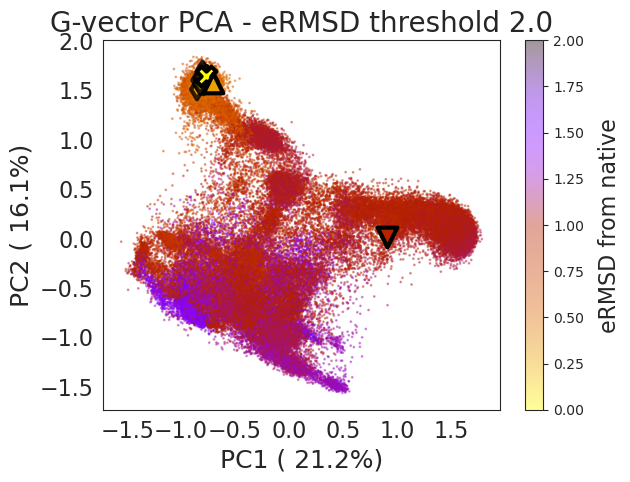

In [11]:
# Plot the points to the map of the first two PCs.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

cm = plt.cm.get_cmap('gnuplot_r')
sc = plt.scatter(w[:,0],w[:,1], c=list(ermsd[qq])+[ermsd_native, ermsd_seed1, ermsd_seed2]+list(ermsd_pdb), vmin=0, vmax=up_thresh, cmap=cm, alpha=0.4, s=1)

plt.scatter(w[-(NUM_REFS+len(ermsd_pdb)),0],w[-(NUM_REFS+len(ermsd_pdb)),1], s=200, lw=3, c=ermsd_native, cmap=cm, vmin=0, vmax=up_thresh, ec="black", zorder=3, marker="X") #plot native
plt.scatter(w[-((NUM_REFS-1)+len(ermsd_pdb)),0],w[-((NUM_REFS-1)+len(ermsd_pdb)),1], s=200, lw=3, c=ermsd_seed1, cmap=cm, vmin=0, vmax=up_thresh, ec="black", zorder=3, marker="^") #plot native
plt.scatter(w[-((NUM_REFS-2)+len(ermsd_pdb)),0],w[-((NUM_REFS-2)+len(ermsd_pdb)),1], s=200, lw=3, c=ermsd_seed2, cmap=cm, vmin=0, vmax=up_thresh, ec="black", zorder=3, marker="v") #plot native
plt.scatter(w[-len(ermsd_pdb):,0],w[-len(ermsd_pdb):,1], s=100, lw=3, c=ermsd_pdb, cmap=cm, vmin=0, vmax=up_thresh, ec="black", alpha=0.8, zorder=2, marker="d") #plot seed

cbar = plt.colorbar(sc)
cbar.set_label('eRMSD from native', labelpad=10, rotation=90, fontsize=16)

plt.title("G-vector PCA - eRMSD threshold %s" %up_thresh, fontsize=20)
plt.xlabel("PC1 (%5.1f%s)" %(v[0]*100,"%"), fontsize=18)
plt.ylabel("PC2 (%5.1f%s)" %((v[1]-v[0])*100,"%"), fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("%s/eRMSD_PC1-PC2-thresh%1.2f.png" %(outdir, up_thresh), dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# eps:0.500 min_samples:200  nclusters: 27
#  silhouette score: 0.0734
# Avg silhouette: 0.5730 
# assigned samples :40464 total samples:80031 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 13677                0.971                0.402                0.611                0.294 03 461
# 01 7464                1.012                0.440                0.783                0.312 00 50
# 02 2921                0.867                0.336                0.514                0.248 10 29905
# 03 1710                0.755                0.287                0.499                0.209 07 46285
# 04 1642                0.705                0.359                0.448                0.280 23 51433
# 05 1186                0.741                0.348                0.473                0.263 11 69196
# 06 1185                0.692                0.325                0.443                0.245 05 64886
# 07 1075                0.823       

/home/dista/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


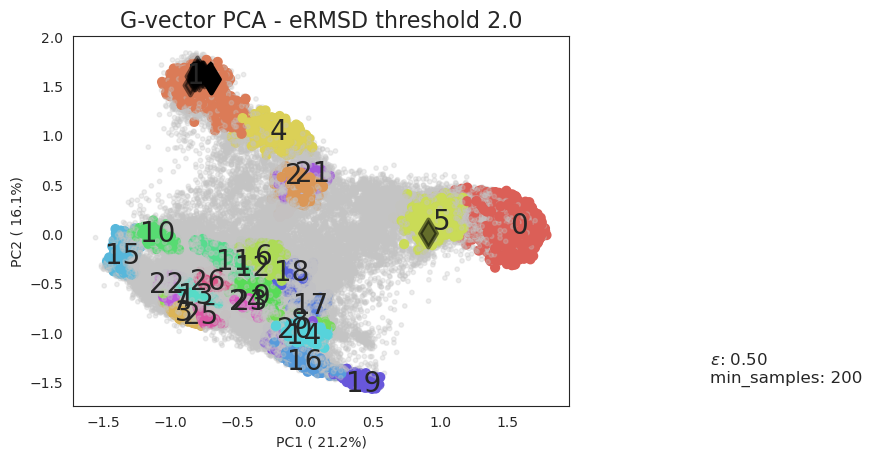

In [12]:
# Make use of DBSCAN in sklearn to perform clustering based on eRMSD. 
#(suggested to use an eps that clusters together structures with similar eRMSD
#and min_samples value that guaranties cluster size >=1% trajectory)
# The eps value used gives clusters from the whole map.
eps=0.25 #barnaba implicitly multiplies this by sqrt(len(seq)), i.e. 2 in the case of UUCG
min_samples=200
new_labels, center_idx = cc.dbscan(np.concatenate((gvecs, gvecs_pdb), axis=0), range(gvecs.shape[0]+gvecs_pdb.shape[0]), eps=eps, min_samples=min_samples)

# Color the PCA according to the different cluster and display the centroid as a label.
cp = sns.color_palette("hls", len(center_idx)+1)
colors = [cp[j-1] if(j!=0) else (0.77, 0.77, 0.77, 0.3) for j in new_labels]
size = [40 if(j!=0) else 10 for j in new_labels]
#do scatterplot
plt.scatter(w[:,0], w[:,1], s=size, c=colors)
plt.scatter(w[-(NUM_REFS+len(ermsd_pdb)),0],w[-(NUM_REFS+len(ermsd_pdb)),1], s=200, lw=3, c="black", zorder=3, marker="x") #plot native
plt.scatter(w[-((NUM_REFS-1)+len(ermsd_pdb)),0],w[-((NUM_REFS-1)+len(ermsd_pdb)),1], s=200, lw=3, c="black", zorder=3, marker="d") #plot seed
plt.scatter(w[-((NUM_REFS-2)+len(ermsd_pdb)),0],w[-((NUM_REFS-2)+len(ermsd_pdb)),1], s=200, lw=3, c="black", alpha=0.5, zorder=3, marker="d") #plot seed
plt.scatter(w[-len(ermsd_pdb):,0],w[-len(ermsd_pdb):,1], s=100, lw=3, c="black", alpha=0.5, zorder=2, marker="d") #plot pdb ensemble

for i,k in enumerate(center_idx):
    plt.text(w[k,0], w[k,1], str(i), ha="center", va='center', fontsize=20)
plt.xlabel("PC1 (%5.1f%s)" %(v[0]*100,"%"))
plt.ylabel("PC2 (%5.1f%s)" %((v[1]-v[0])*100,"%"))
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(3, -1.5, s=r'$\epsilon$: %1.2f'%(eps*np.sqrt(len(sequence)))+"\n"+"min_samples: %d"%min_samples, bbox=props, fontsize=12)
plt.title("G-vector PCA - eRMSD threshold %s" %up_thresh, fontsize=16)

plt.savefig("%s/eRMSD_clusters_PC1-PC2-eps%1.2f_min%d.png" %(outdir, eps*np.sqrt(len(sequence)), min_samples), dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

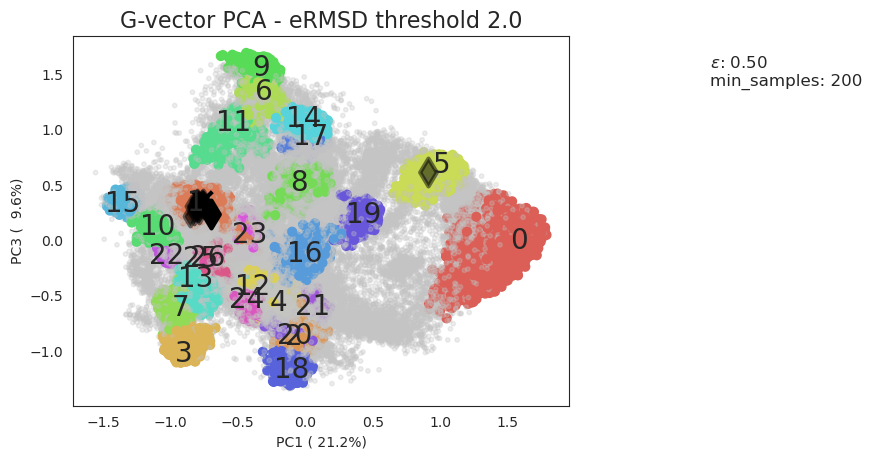

In [13]:
#do the same scatterplot for PCs 1-3
plt.scatter(w[:,0], w[:,2], s=size, c=colors)
plt.scatter(w[-(NUM_REFS+len(ermsd_pdb)),0],w[-(NUM_REFS+len(ermsd_pdb)),2], s=200, lw=3, c="black", zorder=3, marker="x") #plot native
plt.scatter(w[-((NUM_REFS-1)+len(ermsd_pdb)),0],w[-((NUM_REFS-1)+len(ermsd_pdb)),2], s=200, lw=3, c="black", zorder=3, marker="d") #plot seed
plt.scatter(w[-((NUM_REFS-2)+len(ermsd_pdb)),0],w[-((NUM_REFS-2)+len(ermsd_pdb)),2], s=200, lw=3, c="black", alpha=0.5, zorder=3, marker="d") #plot seed
plt.scatter(w[-len(ermsd_pdb):,0],w[-len(ermsd_pdb):,2], s=100, lw=3, c="black", alpha=0.5, zorder=2, marker="d") #plot pdb ensemble

for i,k in enumerate(center_idx):
    plt.text(w[k,0], w[k,2], str(i), ha="center", va='center', fontsize=20)
plt.xlabel("PC1 (%5.1f%s)" %(v[0]*100,"%"))
plt.ylabel("PC3 (%5.1f%s)" %((v[2]-v[1])*100,"%"))
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(3, 1.4, s=r'$\epsilon$: %1.2f'%(eps*np.sqrt(len(sequence)))+"\n"+"min_samples: %d"%min_samples, bbox=props, fontsize=12)
plt.title("G-vector PCA - eRMSD threshold %s" %up_thresh, fontsize=16)

plt.savefig("%s/eRMSD_clusters_PC1-PC3-eps%1.2f_min%d.png" %(outdir, eps*np.sqrt(len(sequence)), min_samples), dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# Cumulative explained variance percentage: PC1= 21.2 PC2= 37.3 PC3= 46.9


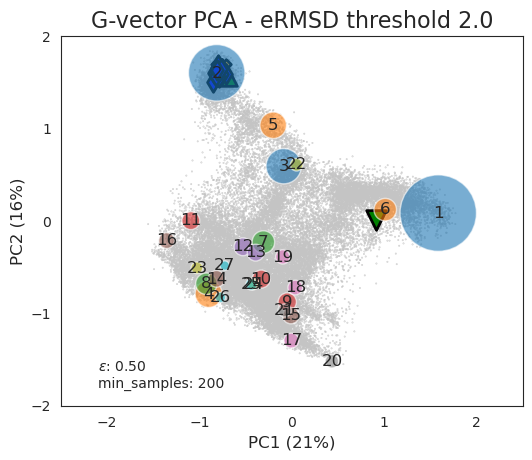

In [14]:
# Plot with a different style.

import seaborn as sns
sns.set_style("white")
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches

#calculate PCs
v,w = cc.pca(np.concatenate((gvecs, gvecs_pdb), axis=0), nevecs=3)
#define figure and set aspect.
fig, ax = plt.subplots(figsize=(6.3,4.8))
ax.set_aspect(1)

#calculate explained variance for the first two components.
plt.xlabel(r'PC1 (%2.0f%s)' %(v[0]*100,"%"), fontsize=12)
plt.ylabel(r'PC2 (%2.0f%s)' %((v[1]-v[0])*100,"%"), fontsize=12)
print("# Cumulative explained variance percentage: PC1=%5.1f PC2=%5.1f PC3=%5.1f" %(v[0]*100,v[1]*100,v[2]*100))

#define colors for clusters. Noise is gray points.
cp = sns.color_palette("hls", n_colors=len(center_idx), desat=0.8)
colors = [cp[j-1] if (j!=0) else (0.77,0.77,0.77) for j in new_labels]
size = [0.12 if (j==0) else 0.0 for j in new_labels]

#scatterplot the noise
plt.scatter(w[:,0],w[:,1], s=size, c=colors, zorder=0)
plt.scatter(w[-(NUM_REFS+len(ermsd_pdb)),0],w[-(NUM_REFS+len(ermsd_pdb)),1], s=200, lw=2, c="orange", ec="black", zorder=1, marker="X") #plot native
plt.scatter(w[-((NUM_REFS-1)+len(ermsd_pdb)),0],w[-((NUM_REFS-1)+len(ermsd_pdb)),1], s=200, lw=2, c="green", ec="black", zorder=1, marker="^") #plot seed
plt.scatter(w[-((NUM_REFS-2)+len(ermsd_pdb)),0],w[-((NUM_REFS-2)+len(ermsd_pdb)),1], s=200, lw=2, c="green", ec="black", zorder=1, marker="v") #plot seed
plt.scatter(w[-len(ermsd_pdb):,0],w[-len(ermsd_pdb):,1], s=100, lw=2, c="blue", ec="black", zorder=1, marker="d") #plot NMR ensemble

#make circles in the center of the cluster
patches = []
new_labels = np.array(new_labels)
for i,k in enumerate(center_idx):
    plt.text(w[k,0],w[k,1], str(i+1), ha="center", va="center", fontsize=12)
    #make the circle radius proportional to the square root of the cluster size.
    rr = np.sqrt(1.*len(np.where(new_labels==i+1)[0])/len(new_labels))
    circle = mpatches.Circle((w[k,0], w[k,1]), rr, ec='k')
    patches.append(circle)
p = PatchCollection(patches, cmap=mpl.cm.tab10, alpha=0.6)
p.set_array(np.arange(len(center_idx))+1)
ax.add_collection(p)

#set nice limits
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.,2.])
ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([-2,-1,0,1,2])
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(-2.1, -1.8, s=r'$\epsilon$: %.2f'%(eps*np.sqrt(len(sequence)))+"\n"+"min_samples: %d"%min_samples, bbox=props, fontsize=10)
plt.title("G-vector PCA - eRMSD threshold %s" %up_thresh, fontsize=16)
plt.savefig("%s/eRMSD_clusters-w_radius-eps%s_min%s.png" %(outdir, eps*np.sqrt(len(sequence)), min_samples), dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# Cumulative explained variance percentage: PC1= 21.2 PC2= 37.3 PC3= 46.9


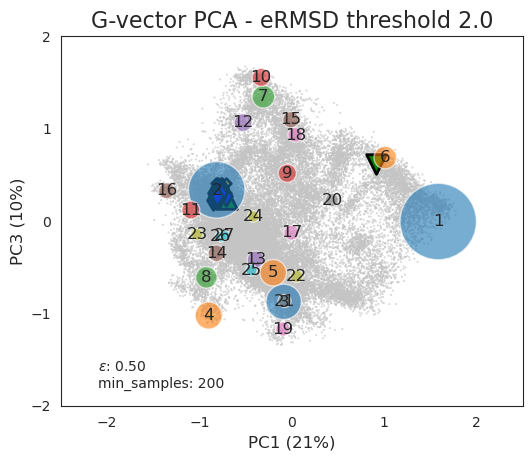

In [15]:
#define figure and set aspect.
fig, ax = plt.subplots(figsize=(6.3,4.8))
ax.set_aspect(1)

#calculate explained variance for the first two components.
plt.xlabel(r'PC1 (%2.0f%s)' %(v[0]*100,"%"), fontsize=12)
plt.ylabel(r'PC3 (%2.0f%s)' %((v[2]-v[1])*100,"%"), fontsize=12)
print("# Cumulative explained variance percentage: PC1=%5.1f PC2=%5.1f PC3=%5.1f" %(v[0]*100,v[1]*100,v[2]*100))

#scatterplot the noise
plt.scatter(w[:,0],w[:,2], s=size, c=colors, zorder=0)
plt.scatter(w[-(NUM_REFS+len(ermsd_pdb)),0],w[-(NUM_REFS+len(ermsd_pdb)),2], s=200, lw=2, c="orange", ec="black", zorder=1, marker="X") #plot native
plt.scatter(w[-((NUM_REFS-1)+len(ermsd_pdb)),0],w[-((NUM_REFS-1)+len(ermsd_pdb)),2], s=200, lw=2, c="green", ec="black", zorder=1, marker="^") #plot seed
plt.scatter(w[-((NUM_REFS-2)+len(ermsd_pdb)),0],w[-((NUM_REFS-2)+len(ermsd_pdb)),2], s=200, lw=2, c="green", ec="black", zorder=1, marker="v") #plot seed
plt.scatter(w[-len(ermsd_pdb):,0],w[-len(ermsd_pdb):,2], s=100, lw=2, c="blue", ec="black", zorder=1, marker="d") #plot NMR ensemble

#make circles in the center of the cluster
patches = []
new_labels = np.array(new_labels)
for i,k in enumerate(center_idx):
    plt.text(w[k,0],w[k,2], str(i+1), ha="center", va="center", fontsize=12)
    #make the circle radius proportional to the square root of the cluster size.
    rr = np.sqrt(1.*len(np.where(new_labels==i+1)[0])/len(new_labels))
    circle = mpatches.Circle((w[k,0], w[k,2]), rr, ec='k')
    patches.append(circle)
p = PatchCollection(patches, cmap=mpl.cm.tab10, alpha=0.6)
p.set_array(np.arange(len(center_idx))+1)
ax.add_collection(p)

#set nice limits
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)
ax.set_xlim([-2.5, 2.5])
ax.set_ylim([-2.,2.])
ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([-2,-1,0,1,2])
props = dict(boxstyle='round', facecolor='white', alpha=0.3)
plt.text(-2.1, -1.8, s=r'$\epsilon$: %.2f'%(eps*np.sqrt(len(sequence)))+"\n"+"min_samples: %d"%min_samples, bbox=props, fontsize=10)
plt.title("G-vector PCA - eRMSD threshold %s" %up_thresh, fontsize=16)
plt.savefig("%s/eRMSD_clusters-w_radius-PC1_PC3-eps%s_min%s.png" %(outdir, eps*np.sqrt(len(sequence)), min_samples), dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

Using 10001 frames per trajectory
# Cumulative explained variance percentage: PC1= 21.2 PC2= 37.3 PC3= 46.9


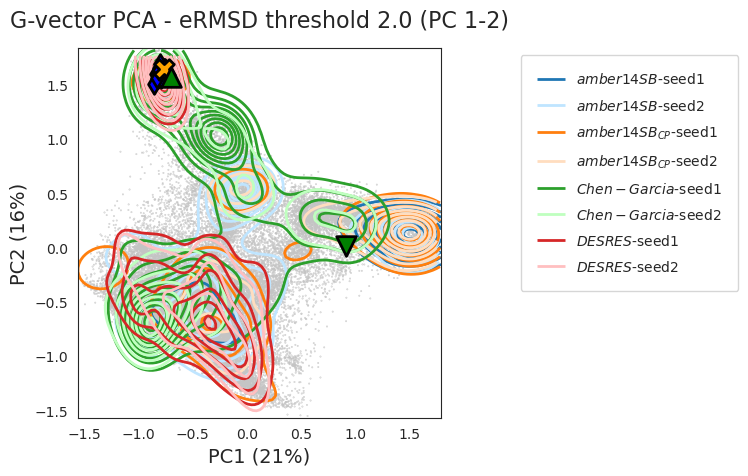

In [16]:
# Contour plots of the ensembles.

from scipy.stats import gaussian_kde
import matplotlib.cm as cm

def density_estimation(m1, m2):
    xmin = np.min(m1)
    xmax = np.max(m1)
    ymin = np.min(m2)
    ymax = np.max(m2)

    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z , xmin, xmax, ymin, ymax

# define some basic stuff for data.
ffs = ["amber14SB", "amber14SB_{CP}", "Chen-Garcia", "DESRES"]
runs = ["seed1", "seed2"]

fr_per_trj=len(t)//(len(ffs)*len(runs)) #blocks to split the combined trj into
print("Using %d frames per trajectory"%fr_per_trj)

dims = [0, 1]
size = [0.12 if (j==0) else 0.0 for j in new_labels]


#define figure and set aspect.
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6.3,4.8))
ax.set_aspect(1)

#calculate explained variance for the first two components.
ax.set_xlabel(r'PC1 (%2.0f%s)' %(v[0]*100,"%"), fontsize=12)
ax.set_ylabel(r'PC2 (%2.0f%s)' %((v[1]-v[0])*100,"%"), fontsize=12)
print("# Cumulative explained variance percentage: PC1=%5.1f PC2=%5.1f PC3=%5.1f" %(v[0]*100,v[1]*100,v[2]*100))

#define colors for clusters. Noise is gray points.
cp = sns.color_palette("hls", n_colors=len(center_idx), desat=0.8)
clust_colors = [cp[j-1] if (j!=0) else (0.77,0.77,0.77) for j in new_labels]
#define colors for contours.
cat_cmap = categorical_cmap(len(ffs), len(["seed1", "seed2"]), "tab10")

#scatterplot the noise
ax.scatter(w[:,0],w[:,1], s=size, c=clust_colors, zorder=0)

#plot the contours.
legend_handles = [] #list to save legend handles
counter=0

for i in range(len(ffs)):
    for r in runs:

        x = w[counter*fr_per_trj:(counter+1)*fr_per_trj, dims[0]]
        y = w[counter*fr_per_trj:(counter+1)*fr_per_trj, dims[1]]

        X, Y, Z, xmin, xmax, ymin, ymax = density_estimation(x, y)

        norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

        CS = ax.contour(X, Y, Z, 10, colors=cat_cmap([counter]), extend=max, linewidths=2)
    #     plt.clabel(CS, levels=CS.levels[::2], inline=1, fontsize=10)
        CS.collections[counter].set_label("$%s$-%s"%(ffs[i], r))

        #save legend hadles
        h,_ = CS.legend_elements()
        legend_handles.append(h)
        
        counter+=1

#Plot near-native point (the first one since (if) trajectory starts from native state.)
plt.scatter(w[-(NUM_REFS+len(ermsd_pdb)),dims[0]], w[-(NUM_REFS+len(ermsd_pdb)),dims[1]], s=200, lw=2, c="orange", ec="black", zorder=3, marker="X", label="Native") #plot native
plt.scatter(w[-((NUM_REFS-1)+len(ermsd_pdb)),dims[0]], w[-((NUM_REFS-1)+len(ermsd_pdb)),dims[1]], s=200, lw=2, c="green", ec="black", zorder=3, marker="^", label="Seed1") #plot seed
plt.scatter(w[-((NUM_REFS-2)+len(ermsd_pdb)),dims[0]], w[-((NUM_REFS-2)+len(ermsd_pdb)),dims[1]], s=200, lw=2, c="green", ec="black", zorder=3, marker="v", label="Seed2") #plot seed
plt.scatter(w[-len(ermsd_pdb):,dims[0]], w[-len(ermsd_pdb):,dims[1]], s=100, lw=2, c="blue", ec="black", zorder=2, marker="d", label="NMR") #plot NMR ensemble

#set nice limits
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
# plt.legend(bbox_to_anchor=(1.2, 1), labelspacing=0.8, borderpad=1.2)
plt.legend([H[0] for H in legend_handles], ["$%s$-%s"%(ff, r) for ff in ffs for r in runs], loc='upper left', bbox_to_anchor=(1.2,1), labelspacing=0.8, borderpad=1.2, ncol=1)
plt.title("G-vector PCA - eRMSD threshold %s (PC 1-2)" %up_thresh, fontsize=16, pad=15)
plt.savefig("%s/eRMSD_clusters-Gvec_contours_pc_1-2.png" %(outdir), dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# Cumulative explained variance percentage: PC1= 21.2 PC2= 37.3 PC3= 46.9


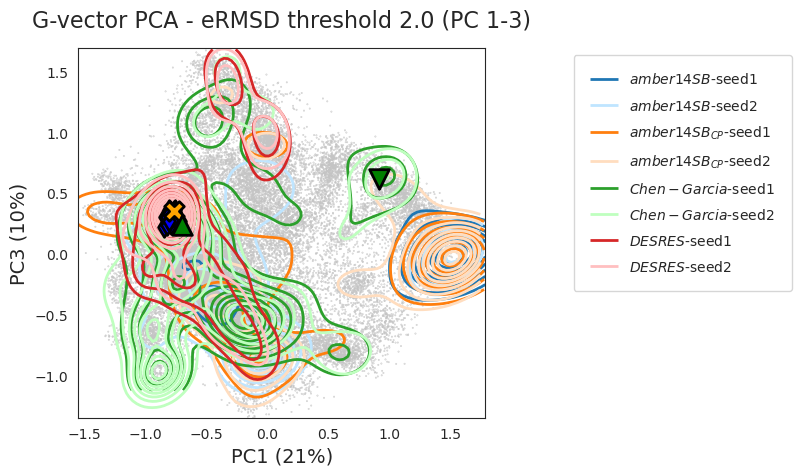

In [17]:
#define figure and set aspect.
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6.3,4.8))
ax.set_aspect(1)

#calculate explained variance for the first two components.
ax.set_xlabel(r'PC1 (%2.0f%s)' %(v[0]*100,"%"), fontsize=12)
ax.set_ylabel(r'PC3 (%2.0f%s)' %((v[2]-v[1])*100,"%"), fontsize=12)
print("# Cumulative explained variance percentage: PC1=%5.1f PC2=%5.1f PC3=%5.1f" %(v[0]*100,v[1]*100,v[2]*100))

#scatterplot the noise
ax.scatter(w[:,0],w[:,2], s=size, c=clust_colors, zorder=0)

#plot the contours.
dims=[0,2]

legend_handles=[]
counter=0

for i in range(len(ffs)):
    for r in runs:

        x = w[counter*fr_per_trj:(counter+1)*fr_per_trj, dims[0]]
        y = w[counter*fr_per_trj:(counter+1)*fr_per_trj, dims[1]]

        X, Y, Z, xmin, xmax, ymin, ymax = density_estimation(x, y)

        norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

        CS = ax.contour(X, Y, Z, 10, colors=cat_cmap([counter]), extend=max, linewidths=2)
        CS.collections[counter].set_label("$%s$-%s"%(ffs[i], r))
        
        #save legend hadles
        h,_ = CS.legend_elements()
        legend_handles.append(h)
        
        counter+=1
        

#Plot near-native point (the first one since (if) trajectory starts from native state.)
plt.scatter(w[-(NUM_REFS+len(ermsd_pdb)),dims[0]], w[-(NUM_REFS+len(ermsd_pdb)),dims[1]], s=200, lw=2, c="orange", ec="black", zorder=3, marker="X", label="Native") #plot native
plt.scatter(w[-((NUM_REFS-1)+len(ermsd_pdb)),dims[0]], w[-((NUM_REFS-1)+len(ermsd_pdb)),dims[1]], s=200, lw=2, c="green", ec="black", zorder=3, marker="^", label="Seed1") #plot seed
plt.scatter(w[-((NUM_REFS-2)+len(ermsd_pdb)),dims[0]], w[-((NUM_REFS-2)+len(ermsd_pdb)),dims[1]], s=200, lw=2, c="green", ec="black", zorder=3, marker="v", label="Seed2") #plot seed
plt.scatter(w[-len(ermsd_pdb):,dims[0]], w[-len(ermsd_pdb):,dims[1]], s=100, lw=2, c="blue", ec="black", zorder=2, marker="d", label="NMR") #plot NMR ensemble

#set nice limits
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
# plt.legend(bbox_to_anchor=(1.2, 1), labelspacing=0.8, borderpad=1.2)
plt.legend([H[0] for H in legend_handles], ["$%s$-%s"%(ff, r) for ff in ffs for r in runs], loc='upper left', bbox_to_anchor=(1.2,1), labelspacing=0.8, borderpad=1.2, ncol=1)
plt.title("G-vector PCA - eRMSD threshold %s (PC 1-3)" %up_thresh, fontsize=16, pad=15)
plt.savefig("%s/eRMSD_clusters-Gvec_contours_pc_1-3.png" %(outdir), dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# Cumulative explained variance percentage: PC1= 21.2 PC2= 37.3 PC3= 46.9


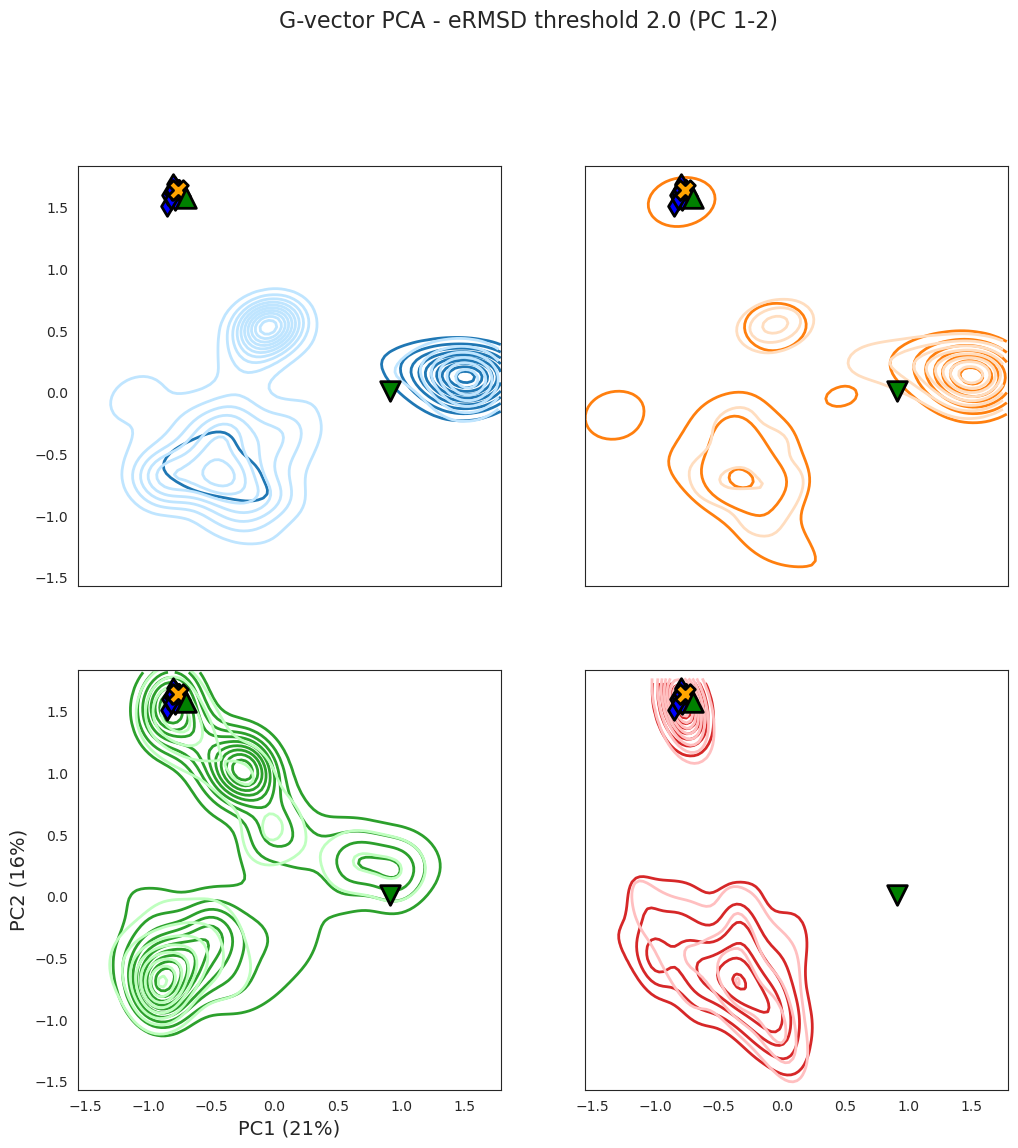

In [18]:
# Plot individual contours.
rows=2
cols=2

dims = [0, 1]

#define figure and set aspect.
fig, ax = plt.subplots(nrows=rows,ncols=cols, sharex=True, sharey=True, squeeze=True, figsize=(12, 12))

#calculate explained variance for the first two components.
print("# Cumulative explained variance percentage: PC1=%5.1f PC2=%5.1f PC3=%5.1f" %(v[0]*100,v[1]*100,v[2]*100))

#plot the contours.
counter=0
legend_handles=[]


for i in range(len(ffs)):
    plt.subplot(rows, cols, i+1)
    
    plt.xlim([w[:,dims[0]].min(), w[:,dims[0]].max()])
    plt.ylim([w[:,dims[1]].min(), w[:,dims[1]].max()])
    
    for r in runs:
        x = w[counter*fr_per_trj:(counter+1)*fr_per_trj, dims[0]]
        y = w[counter*fr_per_trj:(counter+1)*fr_per_trj, dims[1]]

        X, Y, Z, xmin, xmax, ymin, ymax = density_estimation(x, y)

        norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

        CS = plt.contour(X, Y, Z, 10, colors=cat_cmap([counter]), extend=max, linewidths=2)
        #plt.clabel(CS, levels=CS.levels[::2], inline=1, fontsize=10, colors="k")
        CS.collections[counter].set_label("$%s$-%s"%(ffs[i], r))
        
        #save legend hadles
        h,_ = CS.legend_elements()
        legend_handles.append(h)
        
        counter+=1

    #Plot near-native point (the first one since (if) trajectory starts from native state.)
    plt.scatter(w[-(NUM_REFS+len(ermsd_pdb)),dims[0]], w[-(NUM_REFS+len(ermsd_pdb)),dims[1]], s=200, lw=2, c="orange", ec="black", zorder=3, marker="X", label="Native") #plot native
    plt.scatter(w[-((NUM_REFS-1)+len(ermsd_pdb)),dims[0]], w[-((NUM_REFS-1)+len(ermsd_pdb)),dims[1]], s=200, lw=2, c="green", ec="black", zorder=3, marker="^", label="Seed1") #plot seed
    plt.scatter(w[-((NUM_REFS-2)+len(ermsd_pdb)),dims[0]], w[-((NUM_REFS-2)+len(ermsd_pdb)),dims[1]], s=200, lw=2, c="green", ec="black", zorder=3, marker="v", label="Seed2") #plot seed
    plt.scatter(w[-len(ermsd_pdb):,dims[0]], w[-len(ermsd_pdb):,dims[1]], s=100, lw=2, c="blue", ec="black", zorder=2, marker="d", label="NMR") #plot NMR ensemble


#set nice limits
ax[1,0].set_xlabel(r'PC1 (%2.0f%s)' %(v[0]*100,"%"), fontsize=14)
ax[1,0].set_ylabel(r'PC2 (%2.0f%s)' %((v[1]-v[0])*100,"%"), fontsize=14)
plt.suptitle("G-vector PCA - eRMSD threshold %s (PC 1-2)" %up_thresh, fontsize=16, y=1.01)
plt.savefig("%s/eRMSD_clusters-Gvec_panels-PC1_PC2.png" %(outdir), dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# Cumulative explained variance percentage: PC1= 21.2 PC2= 37.3 PC3= 46.9


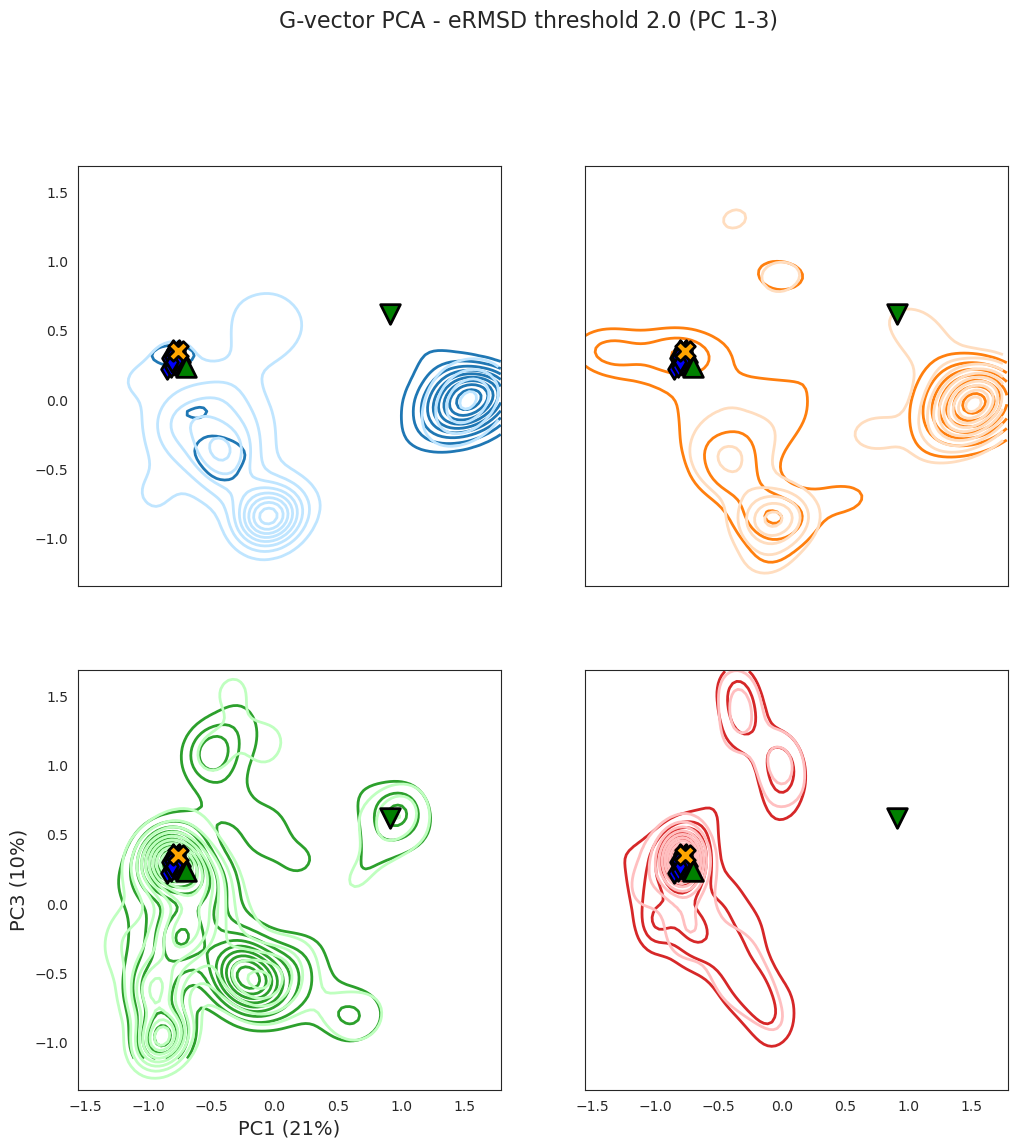

In [19]:
dims = [0, 2]

#define figure and set aspect.
fig, ax = plt.subplots(nrows=rows,ncols=cols, sharex=True, sharey=True, squeeze=True, figsize=(12, 12))

#calculate explained variance for the first two components.
print("# Cumulative explained variance percentage: PC1=%5.1f PC2=%5.1f PC3=%5.1f" %(v[0]*100,v[1]*100,v[2]*100))

#plot the contours.
counter=0
legend_handles=[]


for i in range(len(ffs)):
    plt.subplot(rows, cols, i+1)
    
    plt.xlim([w[:,dims[0]].min(), w[:,dims[0]].max()])
    plt.ylim([w[:,dims[1]].min(), w[:,dims[1]].max()])
    
    for r in runs:
        x = w[counter*fr_per_trj:(counter+1)*fr_per_trj, dims[0]]
        y = w[counter*fr_per_trj:(counter+1)*fr_per_trj, dims[1]]

        X, Y, Z, xmin, xmax, ymin, ymax = density_estimation(x, y)

        norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

        CS = plt.contour(X, Y, Z, 10, colors=cat_cmap([counter]), extend=max, linewidths=2)
        #plt.clabel(CS, levels=CS.levels[::2], inline=1, fontsize=10, colors="k")
        CS.collections[counter].set_label("$%s$-%s"%(ffs[i], r))
        
        #save legend hadles
        h,_ = CS.legend_elements()
        legend_handles.append(h)
        
        counter+=1

    #Plot near-native point (the first one since (if) trajectory starts from native state.)
    plt.scatter(w[-(NUM_REFS+len(ermsd_pdb)),dims[0]], w[-(NUM_REFS+len(ermsd_pdb)),dims[1]], s=200, lw=2, c="orange", ec="black", zorder=3, marker="X", label="Native") #plot native
    plt.scatter(w[-((NUM_REFS-1)+len(ermsd_pdb)),dims[0]], w[-((NUM_REFS-1)+len(ermsd_pdb)),dims[1]], s=200, lw=2, c="green", ec="black", zorder=3, marker="^", label="Seed1") #plot seed
    plt.scatter(w[-((NUM_REFS-2)+len(ermsd_pdb)),dims[0]], w[-((NUM_REFS-2)+len(ermsd_pdb)),dims[1]], s=200, lw=2, c="green", ec="black", zorder=3, marker="v", label="Seed2") #plot seed
    plt.scatter(w[-len(ermsd_pdb):,dims[0]], w[-len(ermsd_pdb):,dims[1]], s=100, lw=2, c="blue", ec="black", zorder=2, marker="d", label="NMR") #plot NMR ensemble

#set nice limits
ax[1,0].set_xlabel(r'PC1 (%2.0f%s)' %(v[0]*100,"%"), fontsize=14)
ax[1,0].set_ylabel(r'PC3 (%2.0f%s)' %((v[2]-v[1])*100,"%"), fontsize=14)
plt.suptitle("G-vector PCA - eRMSD threshold %s (PC 1-3)" %up_thresh, fontsize=16, y=1.01)
plt.savefig("%s/eRMSD_clusters-Gvec_panels-PC1_PC3.png" %(outdir), dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# Cluster statistics

In [20]:
# Save the cluster centroids to PDB files and cluster members to xtc trajectories for further analysis.
clustdir = "%s/snippet_clusters-eps%s_min%s" %(outdir, eps*np.sqrt(len(sequence)), min_samples)
os.system("mkdir %s" % clustdir)

print("# Write centroids to PDB files and cluster members to .xtc")
print(t)

# Write centroids to PDB files and cluster members to .xtc
<mdtraj.Trajectory with 80008 frames, 447 atoms, 14 residues, and unitcells>


In [21]:
dd1 = []  #will store the eRMSDs of each frame to its centroid.
dd2 = []  #will store the RMSDs of each frame to its centroid.
ll = []  #will store the cluster population relative to all the frames. 

for i,k in enumerate(center_idx):
    t[qq[k]].save_gro("%s/cluster_%03d.test.gro" %(clustdir, i))
    idxs = [ii for ii,kk in enumerate(new_labels[:-(NUM_REFS+len(ermsd_pdb))]) if(kk==i+1)] #exclude native/seed states
    t[qq[idxs]].save_xtc("%s/cluster_%03d.traj.xtc" %(clustdir, i))
    ll.append(100.*len(idxs)/(n))
    ermsd_t = bb.ermsd("%s/cluster_%03d.test.gro" %(clustdir,i), "%s/cluster_%03d.traj.xtc" %(clustdir, i), topology=topol)
    rmsd_t = bb.rmsd("%s/cluster_%03d.test.gro" %(clustdir,i), "%s/cluster_%03d.traj.xtc" %(clustdir,i), topology=topol, heavy_atom=False)
    dd1.append(ermsd_t)
    dd2.append(rmsd_t)

# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_000.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_000.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_001.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_001.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_002.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_002.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_003.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_003.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_004.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_004.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_005.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_005.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_006.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_006.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_007.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_007.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_008.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_008.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_009.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_009.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_010.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_010.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_011.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_011.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_012.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_012.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_013.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_013.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_014.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_014.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_015.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_015.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_016.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_016.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_017.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_017.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_018.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_018.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_019.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_019.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_020.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_020.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_021.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_021.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_022.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_022.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_023.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_023.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_024.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_024.traj.xtc 


# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_025.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_025.traj.xtc 


# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_026.test.gro 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_026.traj.xtc 


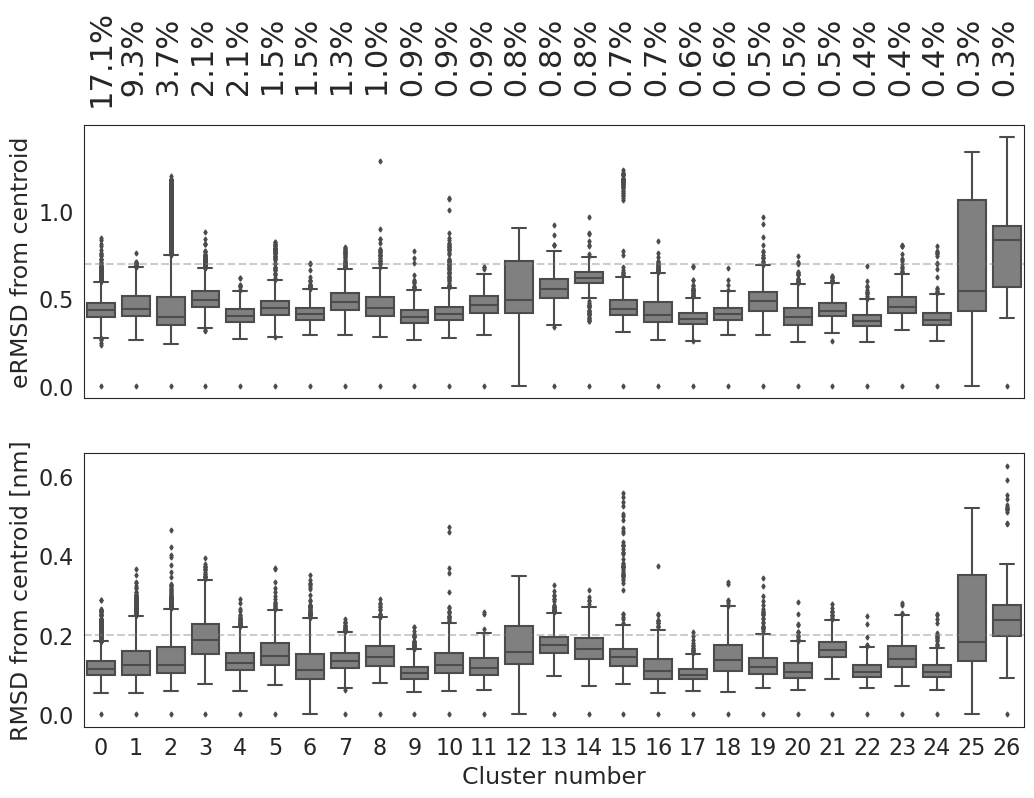

In [22]:
# Box-plot the clustered data to get population statistics (e.g. we can see cluster compactness).

#define the figure.
f, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(11,7))
#do the boxplot
ax1 = sns.boxplot(data=dd1, color='0.5', ax=ax1, fliersize=2.5)
ax1.axhline(0.7, color='grey', alpha=0.4, ls='--')

ax2 = sns.boxplot(data=dd2, color='0.5', fliersize=2.5)
ax2.axhline(0.2, color='grey', alpha=0.4, ls='--')

#write percentages.
for j in range(len(ll)):
    ax1.text(j, 1.6, "%4.1f%s" %(ll[j],"%"), ha='center', va='bottom', rotation=90, fontsize=22)
#set limits and labels
ax1.set_ylabel("eRMSD from centroid", fontsize=17)
ax1.tick_params(axis='both', labelsize=16)

# ax2.set_ylim(0, 0.5)
ax2.set_ylabel("RMSD from centroid [nm]", fontsize=17)
ax2.set_xlabel("Cluster number", fontsize=17)
ax2.tick_params(axis='both', labelsize=16)
ax2.set_xticklabels([str(i) for i in range(len(ll))])
plt.subplots_adjust(right=0.98, top=0.97)
plt.savefig("%s/eRMSD_cluster_boxplts-eps%s_min%s.png" %(outdir, eps*np.sqrt(len(sequence)), min_samples), dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

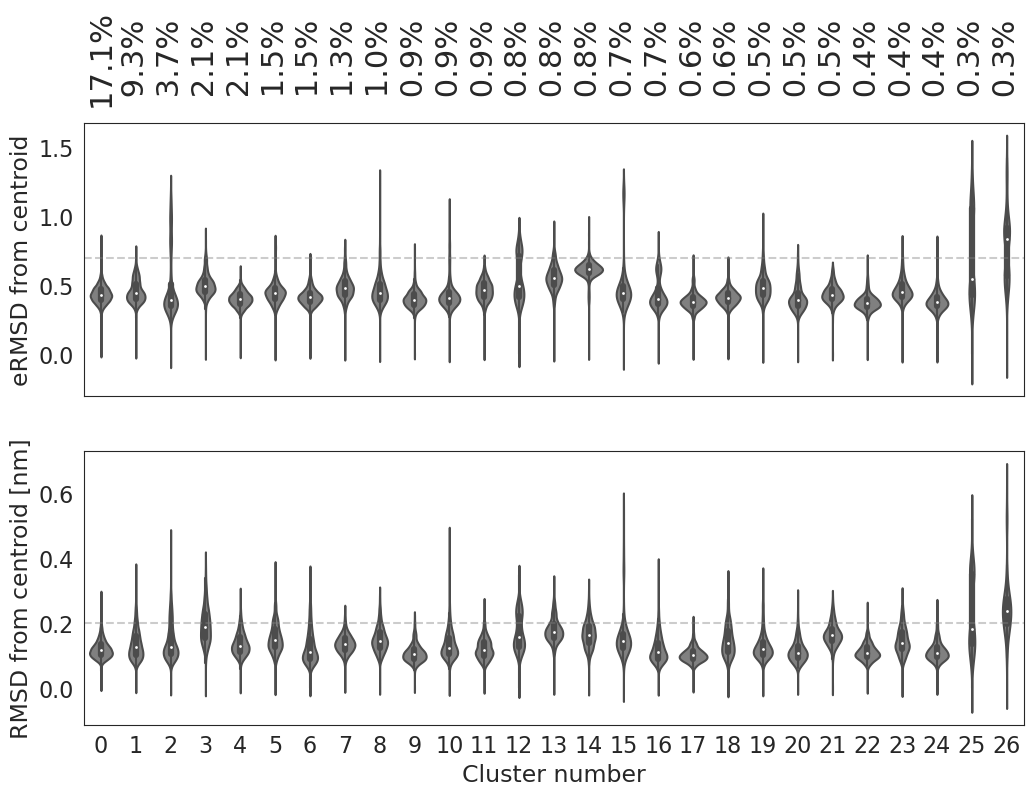

In [23]:
# Box-plot the clustered data to get population statistics (e.g. we can see cluster compactness).

#define the figure.
f, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(11,7))
#do the boxplot
ax1 = sns.violinplot(data=dd1, color='0.5', ax=ax1, fliersize=2.5)
ax1.axhline(0.7, color='grey', alpha=0.4, ls='--')

ax2 = sns.violinplot(data=dd2, color='0.5', fliersize=2.5)
ax2.axhline(0.2, color='grey', alpha=0.4, ls='--')

#write percentages.
for j in range(len(ll)):
    ax1.text(j, 1.8, "%4.1f%s" %(ll[j],"%"), ha='center', va='bottom', rotation=90, fontsize=22)
#set limits and labels
ax1.set_ylabel("eRMSD from centroid", fontsize=17)
ax1.tick_params(axis='both', labelsize=16)

ax2.set_ylabel("RMSD from centroid [nm]", fontsize=17)
ax2.set_xlabel("Cluster number", fontsize=17)
ax2.tick_params(axis='both', labelsize=16)
ax2.set_xticklabels([str(i) for i in range(len(ll))])
plt.subplots_adjust(right=0.98, top=0.97)
plt.savefig("%s/eRMSD_cluster_violplts-eps%s_min%s.png" %(outdir, eps*np.sqrt(len(sequence)), min_samples), dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [24]:
[print(flist[center_idx[i]]) for i in range(len(center_idx))]

print(center_idx)

# Write a file containing the cluster centroids.
with open("%s/cluster_centroids.txt" %clustdir, 'w') as file:
    for n, idx in enumerate(center_idx):
        file.write("cluster %d: %s_6_U__0_%05d.pdb" %(n, traj[len(indir)+1:-4],idx)) #avoid the path and suffix form name
        file.write("\n")

../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00461.pdb
../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_00050.pdb
../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_29905.pdb
../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_46285.pdb
../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_51433.pdb
../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_69196.pdb
../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_64886.pdb
../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_18317.pdb
../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_13837.pdb
../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_73666.pdb
../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-center_6_U_A_0_19693.pdb
../output/UUCG/300K/Gvec_clusters/snippets/traj_all_ffs-rna-cente

# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_000.test.gro 


# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_001.test.gro 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_002.test.gro 


# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_003.test.gro 


# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_004.test.gro 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_005.test.gro 


# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_006.test.gro 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_007.test.gro 


# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_008.test.gro 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_009.test.gro 


# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_010.test.gro 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_011.test.gro 


# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_012.test.gro 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_013.test.gro 


# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_014.test.gro 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_015.test.gro 


# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_016.test.gro 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_017.test.gro 


# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_018.test.gro 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_019.test.gro 


# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_020.test.gro 


# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_021.test.gro 


# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_022.test.gro 


# found  165 atoms in common
# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_023.test.gro 
# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_024.test.gro 


# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_025.test.gro 


# found  165 atoms in common
# found  165 atoms in common


# Loaded reference ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 
# Loaded target ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_026.test.gro 


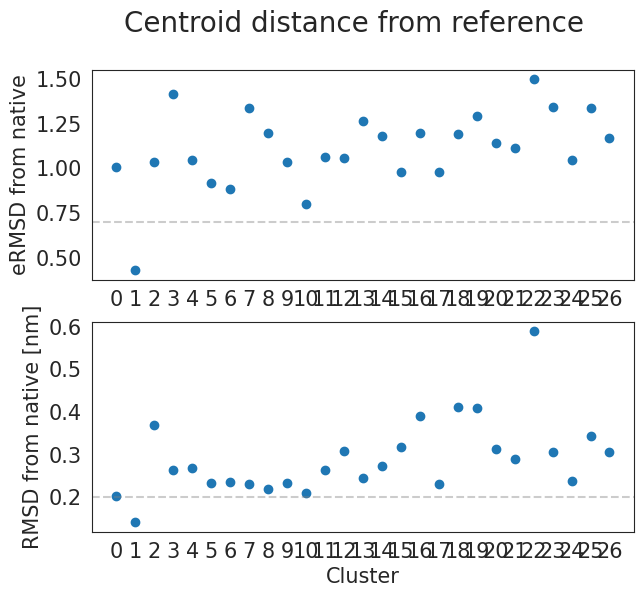

In [25]:
# Calculate the RMSD and eRMSD of centroids to reference structure.

rmsds = []
ermsds = []

with open("%s/centroids_e-RMSD_to_ref.dat" %clustdir, 'w') as file:
    file.write("Cluster_id\tRMSD\teRMSD\n")
    for i in range(len(center_idx)):
        #calculate RMSD on backbone heavy atoms (heavy_atom=False)
        rmsd = bb.rmsd(reference, "%s/cluster_%03d.test.gro" %(clustdir, i) , out="%s/cluster_%03d.aligned.pdb" %(clustdir, i), heavy_atom=False)
        rmsd = bb.rmsd(reference, "%s/cluster_%03d.test.gro" %(clustdir, i) , out="%s/cluster_%03d.aligned.gro" %(clustdir, i), heavy_atom=False)
        rmsds.append(rmsd)
        ermsd = bb.ermsd(reference, "%s/cluster_%03d.test.gro" %(clustdir, i))
        ermsds.append(ermsd)
        file.write("%d\t%f\t%f\n" %(i, rmsd, ermsd))

plt.figure(figsize=(7, 6))
ax1 = plt.subplot2grid((2,1), (0,0))
ax1.scatter(range(len(ermsds)), ermsds)
ax1.axhline(0.7, color='grey', alpha=0.4, ls='--')
ax1.set_ylabel("eRMSD from native", fontsize=15)
ax1.set_xticks(range(len(ermsds)))
ax1.tick_params(axis='both', labelsize=15)

ax2 = plt.subplot2grid((2,1), (1,0))
ax2.scatter(range(len(rmsds)), rmsds)
ax2.axhline(0.2, color='grey', alpha=0.4, ls='--')
ax2.set_ylabel("RMSD from native [nm]", fontsize=15)
ax2.set_xticks(range(len(rmsds)))
ax2.tick_params(axis='both', labelsize=15)
ax2.set_xlabel("Cluster", fontsize=15)

plt.suptitle("Centroid distance from reference", size=20)

plt.savefig("%s/e-RMSD_from_native-eps%s_min%s.png" %(outdir, eps*np.sqrt(len(sequence)), min_samples), dpi=300, transparent = False, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

In [26]:
# Produce the dynamic secondary structures of the clusters.
dynadir = "%s/cluster_dss-eps%s_min%s" %(outdir, eps*np.sqrt(len(sequence)), min_samples)
os.system("mkdir %s" % dynadir)

0

In [27]:
#first produce the DSS of the reference (native) structure.
cmd1 = "barnaba ANNOTATE --trj %s --top %s -o %s/reference" %(reference, reference, dynadir)
cmd2 = "barnaba SEC_STRUCTURE --ann %s/reference.ANNOTATE.stacking.out %s/reference.ANNOTATE.pairing.out -o %s/reference" %(dynadir, dynadir, dynadir)

os.system(cmd1)
os.system(cmd2)

# Loading ../REST2_dynamics/UUCG/300K/reference_structures/UUCG-native.pdb 


# your output will be written to files with prefix ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/reference.ANNOTATE
# your output will be written to files with prefix ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/reference.SEC_STRUCTURE
Using annotation file(s) for structure minimization.
Parsing file  ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/reference.ANNOTATE.stacking.out
Parsing file  ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/reference.ANNOTATE.pairing.out
Calc parameters ...
... done
Start on circle
Make starting config
# E thresh: 5.00e-05
    Step    energy     F_max         hres(max_F)
Added ordering pot [ 2. 11.  3. 10.]
       0 5.997e+06  6.39e+04  1.00e+00         5
      50 2.277e+06  1.70e+04  2.48e-01        11
Added ordering pot [ 3. 10.  4.  9.]
      81 2.247e+06  3.07e+03  1.00e+00         2
Added ordering pot [4. 9. 5. 8.]
      86 2.401e+06  2.31e+03  1.00e+00         2
     100 2.305e+06  2.53e+03  8.

/home/dista/anaconda3/envs/py37/lib/python3.7/site-packages/barnaba/functions.py:1431: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ds_all = np.array(ds_all)[sortkeys][::-1]


0

In [28]:
#do the same for the produced clusters.
for i in range(len(ll)):
    cmd1 = "barnaba ANNOTATE --trj %s/cluster_%03d.traj.xtc --top %s -o %s/c%d" %(clustdir,i, topol, dynadir,i)
    cmd2 = "barnaba SEC_STRUCTURE --ann %s/c%d.ANNOTATE.stacking.out %s/c%d.ANNOTATE.pairing.out -o %s/c%d" %(dynadir,i, dynadir,i, dynadir,i)
    
    os.system(cmd1)
    os.system(cmd2)
    print(cmd1)

# your output will be written to files with prefix ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c0.ANNOTATE


# Loading ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_000.traj.xtc 
/home/dista/anaconda3/envs/py37/lib/python3.7/site-packages/barnaba/functions.py:1431: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ds_all = np.array(ds_all)[sortkeys][::-1]


# your output will be written to files with prefix ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c0.SEC_STRUCTURE
Using annotation file(s) for structure minimization.
Parsing file  ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c0.ANNOTATE.stacking.out
Parsing file  ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c0.ANNOTATE.pairing.out
Calc parameters ...
... done
Start on circle
Make starting config
# E thresh: 5.00e-05
    Step    energy     F_max         hres(max_F)
Added ordering pot [ 2. 11.  3. 10.]
       0 5.503e+06  4.26e+04  1.00e+00         1
      50 2.128e+06  1.38e+04  5.14e-01        10
Added ordering pot [ 3. 10.  4.  9.]
      71 2.099e+06  4.93e+03  1.00e+00         2
Added ordering pot [4. 9. 5. 8.]
      83 2.207e+06  1.77e+03  1.00e+00         4
     100 2.130e+06  5.35e+03  2.96e-02         9
Added ordering pot [ 0. 13.  1. 12.]
     106 2.195e+06  3.00e+03  1.00e+00         9
Added ordering pot [ 1. 12.  2. 11.]
     119 2.

# Loading ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_001.traj.xtc 


# your output will be written to files with prefix ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c1.ANNOTATE


/home/dista/anaconda3/envs/py37/lib/python3.7/site-packages/barnaba/functions.py:1431: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ds_all = np.array(ds_all)[sortkeys][::-1]


# your output will be written to files with prefix ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c1.SEC_STRUCTURE
Using annotation file(s) for structure minimization.
Parsing file  ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c1.ANNOTATE.stacking.out
Parsing file  ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c1.ANNOTATE.pairing.out
Calc parameters ...
... done
Start on circle
Make starting config
# E thresh: 5.00e-05
    Step    energy     F_max         hres(max_F)
Added ordering pot [ 2. 11.  3. 10.]
       0 5.591e+06  4.27e+04  1.00e+00         1
      50 2.183e+06  1.69e+04  2.48e-01        11
Added ordering pot [ 3. 10.  4.  9.]
      75 2.154e+06  5.21e+03  1.00e+00         2
Added ordering pot [4. 9. 5. 8.]
      85 2.279e+06  8.35e+02  1.00e+00         4
     100 2.199e+06  3.11e+03  1.03e-01         4
Added ordering pot [ 0. 13.  1. 12.]
     102 2.257e+06  5.40e+03  1.00e+00         4
Added ordering pot [ 1. 12.  2. 11.]
     117 2.

# Loading ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_002.traj.xtc 


# your output will be written to files with prefix ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c2.ANNOTATE


/home/dista/anaconda3/envs/py37/lib/python3.7/site-packages/barnaba/functions.py:1431: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ds_all = np.array(ds_all)[sortkeys][::-1]


# your output will be written to files with prefix ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c2.SEC_STRUCTURE
Using annotation file(s) for structure minimization.
Parsing file  ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c2.ANNOTATE.stacking.out
Parsing file  ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c2.ANNOTATE.pairing.out
Calc parameters ...
... done
Start on circle
Make starting config
# E thresh: 5.00e-05
    Step    energy     F_max         hres(max_F)
Added ordering pot [ 2. 11.  3. 10.]
       0 5.802e+06  5.68e+04  1.00e+00         8
      50 2.384e+06  7.60e+03  3.68e-01        11
Added ordering pot [ 3. 10.  4.  9.]
      88 2.249e+06  2.92e+03  1.00e+00        11
     100 2.241e+06  4.86e+03  7.13e-02        10
Added ordering pot [4. 9. 5. 8.]
     101 2.516e+06  1.87e+03  1.00e+00         9
Added ordering pot [ 0. 13.  1. 12.]
     123 2.378e+06  1.17e+04  1.00e+00        10
Added ordering pot [ 1. 12.  2. 11.]
     148 2.

# Loading ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_003.traj.xtc 


# your output will be written to files with prefix ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c3.ANNOTATE


/home/dista/anaconda3/envs/py37/lib/python3.7/site-packages/barnaba/functions.py:1431: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ds_all = np.array(ds_all)[sortkeys][::-1]


# your output will be written to files with prefix ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c3.SEC_STRUCTURE
Using annotation file(s) for structure minimization.
Parsing file  ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c3.ANNOTATE.stacking.out
Parsing file  ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c3.ANNOTATE.pairing.out
Calc parameters ...
... done
Start on circle
Make starting config
# E thresh: 5.00e-05
    Step    energy     F_max         hres(max_F)
Added ordering pot [ 2. 11.  3. 10.]
       0 5.250e+06  8.08e+04  1.00e+00         9
      50 2.320e+06  3.48e+03  2.13e-01         2
Added ordering pot [ 3. 10.  4.  9.]
      68 2.325e+06  6.08e+03  1.00e+00        11
Added ordering pot [ 0. 13.  1. 12.]
      79 2.409e+06  2.18e+03  1.00e+00        10
Added ordering pot [ 1. 12.  2. 11.]
      95 2.390e+06  1.43e+03  1.00e+00         9
     100 2.356e+06  4.83e+03  9.95e-02         0
Reduced straight pot
     108 7.486e+05  3.1

# Loading ../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_004.traj.xtc 


# your output will be written to files with prefix ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c4.ANNOTATE


/home/dista/anaconda3/envs/py37/lib/python3.7/site-packages/barnaba/functions.py:1431: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ds_all = np.array(ds_all)[sortkeys][::-1]


# your output will be written to files with prefix ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c4.SEC_STRUCTURE
Using annotation file(s) for structure minimization.
Parsing file  ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c4.ANNOTATE.stacking.out
Parsing file  ../output/UUCG/300K/Gvec_clusters/cluster_dss-eps0.5_min200/c4.ANNOTATE.pairing.out
Calc parameters ...
... done
Start on circle
Make starting config
# E thresh: 5.00e-05
    Step    energy     F_max         hres(max_F)
Added ordering pot [ 2. 11.  3. 10.]
       0 5.533e+06  4.31e+04  1.00e+00         1
Added ordering pot [ 3. 10.  4.  9.]
      39 2.223e+06  3.62e+04  1.00e+00         2
      50 2.125e+06  8.79e+03  2.48e-01        10
Added ordering pot [4. 9. 5. 8.]
      88 2.202e+06  2.01e+03  1.00e+00        11
     100 2.129e+06  5.65e+03  5.94e-02         9
Added ordering pot [ 0. 13.  1. 12.]
     105 2.189e+06  5.33e+03  1.0

limit_output extension: Maximum message size of 10000 exceeded with 10567 characters

# Cluster centroid visualization

In [29]:
# Visualize the centroids. (insert as many cluster_# lines as you need)
import py3Dmol as p3m

mols = {}

rows = 2
cols = 3
centroids = 3
# centroids = len(center_idx) #the number of centroids you want to visualise.

# Load the cluster centroids.
for c in range(centroids):
    mol = open("%s/cluster_%03d.aligned.gro" %(clustdir, c), 'r').read()
    mols["cluster_%s" %c] = mol
    del mol

# Set up the view and load the molecules on windows.
view = p3m.view(width=900, height=600, viewergrid=(rows,cols), linked=False)  #set the size of the 2x2 widget window.
view.addModel(open("%s/z_UUCG-native.pdb"%outdir, 'r').read(), 'pdb', viewer=(0,0))  #open/load the gro file of the native structure in the first row, first column.
view.addModel(open("%s/z_UUCG-nmr.pdb"%outdir, 'r').read(), 'pdb', viewer=(0,1))  #open/load the gro file of the native structure in the first row, first column.
view.addModel(open("%s/z_UUCG-simrna.pdb"%outdir, 'r').read(), 'pdb', viewer=(0,2))  #open/load the gro file of the native structure in the first row, first column.

for i, x in enumerate(range(centroids), 3):
    r = i//cols
    c = i%cols
    view.addModel(mols["cluster_%s" %x], 'gro', viewer=(r,c))

view.setViewStyle({'style':'outline','color':'black','width':0.08})
view.setStyle({'stick':{}})  #render the structure in sticks
view.setBackgroundColor('0xffffff')  #set background color to white (for light gray use 0xeeeeee)
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [30]:
# Superpose the derived centroids
outdir = "%s/snippet_clusters-eps%1.2f_min%d" % (outdir, eps*np.sqrt(len(sequence)), min_samples)
ref_frame = md.load(reference)
topol_ref = ref_frame.topology
print(ref_frame)
print(topol_ref)
print(clustdir)

# Superpose centered trajectory based on stem C3' atoms of frame 0.
C3_prm = [atom.index for atom in topol_ref.atoms if atom.name=="C3'"]
super_idx = [C3_prm[i] for i in [0,1,2,3,4,  9,10,11,12,13]] #PUT THE STEM RESIDS HERE

flist = glob.glob("{}/*.test.gro".format(clustdir))
print(flist)

for file in flist:
    centroid = md.load(file)
    centroid_super = centroid.superpose(ref_frame, frame=0, atom_indices=super_idx)
    print(centroid_super)
    centroid_super.save(file[:-4]+"-stem_align.gro")

<mdtraj.Trajectory with 1 frames, 447 atoms, 14 residues, and unitcells>
<mdtraj.Topology with 1 chains, 14 residues, 447 atoms, 410 bonds>
../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200
['../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_000.test.gro', '../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_001.test.gro', '../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_002.test.gro', '../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_003.test.gro', '../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_004.test.gro', '../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_005.test.gro', '../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_006.test.gro', '../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_007.test.gro', '../output/UUCG/300K/Gvec_clusters/snippet_clusters-eps0.5_min200/cluster_008.test